# Script to Learn the Modell

Uses the generated features from extraction.csv to train different models and evaluate them.

In [1]:
#Import Used Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import graphviz
# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


In [2]:
# Set the Path for the Data and print the folder names (genre):
import os
general_path = '../Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: '../Data/genres_original/'

### Reading in the Data (extraction.csv)

In [3]:
data = pd.read_csv(f'{general_path}/extraction.csv')    # Read the .csv with Pandas and save it in a dataframe
data = data.iloc[0:, 4:]  # Drop the columns with are not containing features like directory and name of the song
data.head() # Show the features to check the correct extraction

,genre,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,pop,66150,0.354070,0.092004,0.133745,0.002745,3041.383942,7.140194e+05,3126.119651,180625.664149,...,-4.089583,75.57888,-1.411003,99.614204,-0.176044,120.819310,-0.039866,78.57467,-3.026498,86.393980
1,pop,66150,0.346957,0.089579,0.143777,0.001806,2922.334626,1.250350e+06,2960.381766,225852.280494,...,-9.136294,75.58028,-6.210502,64.975600,-2.355854,87.215126,0.570278,94.36551,3.037296,105.467790
2,pop,66150,0.328392,0.090207,0.130174,0.002610,2802.174545,7.740314e+05,3067.712826,229109.502454,...,-2.438187,76.66625,-1.685730,116.244995,-0.341338,114.137760,-0.482767,104.12715,-3.239160,106.196540
3,pop,66150,0.310396,0.079919,0.171010,0.002549,2723.966562,9.677586e+05,2968.551682,172274.167333,...,-0.765207,159.05185,-1.928844,140.865980,-3.151660,95.238190,-8.257116,86.09109,-8.010163,141.839810
4,pop,66150,0.440510,0.085436,0.148661,0.002220,2377.343178,8.584688e+05,2897.081914,198226.454488,...,0.535785,32.92679,-1.269861,46.452496,-0.986701,28.281464,-3.069595,39.76437,-8.417820,50.494537


### Split Data in Features and Label

In [4]:
y = data['genre'] # Get genre variable for the Label.
X = data.loc[:, data.columns != 'genre'] #select all columns but not the labels

#### NORMALIZE X: Attention at Usage!! Not needed for XGBoost ####

# Normalize so everything is on the same scale. 

#cols = X.columns
#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(X)

#new data frame with the new scaled data. 
#X = pd.DataFrame(np_scaled, columns = cols)

### Splitting the data into training and testing

* 70% - 30% split

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # The label encoder maps the genres to numbers so that they can be processed by the learning algorithm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

### Model Evaluation with 10 Models

In [6]:
# Create a function to train the modell and evaluate the performance

# TO DO: Add additional performance measurements variables like F1-Score!
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train) # Train the modell
    preds = model.predict(X_test)   # Make a prediction on all the test data
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(metrics.accuracy_score(y_test, preds), 5), '\n')    # Compare the results of the prediction with the correct labels
    print('Classification-Report for ', title, ':\n',metrics.classification_report(y_test, preds, digits=4),'\n')

Creation of the models and evaluation with the "model_acess"-function:

In [36]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")


# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.43306 

Classification-Report for  Naive Bayes :
               precision    recall  f1-score   support

           0     0.3867    0.2357    0.2929       297
           1     0.6513    0.8912    0.7526       285
           2     0.4000    0.3444    0.3701       302
           3     0.2993    0.4256    0.3514       289
           4     0.4863    0.2518    0.3318       282
           5     0.6264    0.2065    0.3106       276
           6     0.3270    0.8896    0.4782       308
           7     0.6920    0.5423    0.6081       319
           8     0.4379    0.4325    0.4352       326
           9     0.2830    0.0965    0.1439       311

    accuracy                         0.4331      2995
   macro avg     0.4590    0.4316    0.4075      2995
weighted avg     0.4574    0.4331    0.4080      2995
 

Accuracy Stochastic Gradient Descent : 0.13957 

Classification-Report for  Stochastic Gradient Descent :
               precision    recall  f1-score   support

  

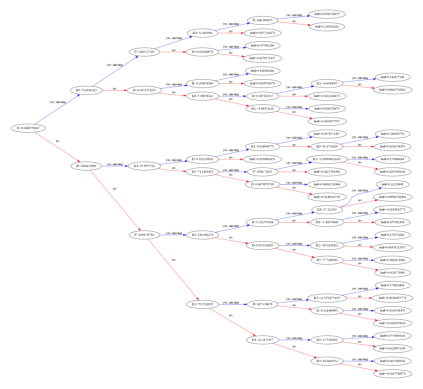

In [10]:
# Final model based on the best results from above:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
#xgb.fit(X_train, y_train)
#xgb.save_model("xgb_model.txt")     # Save learned model into a .txt-File
xgb.load_model("../Trained_Models/xgb_model.txt")
plot_importance(xgb)
plt.savefig("tree", format='eps')
plt.show()


### Training with XGBoost + Confusion Matrix

Accuracy : 0.89649 

              precision    recall  f1-score   support

           0     0.9064    0.9125    0.9094       297
           1     0.9377    0.9509    0.9443       285
           2     0.8055    0.8775    0.8399       302
           3     0.8976    0.9100    0.9038       289
           4     0.9167    0.8972    0.9068       282
           5     0.8696    0.8696    0.8696       276
           6     0.9209    0.9448    0.9327       308
           7     0.9224    0.9310    0.9267       319
           8     0.9320    0.8834    0.9071       326
           9     0.8601    0.7910    0.8241       311

    accuracy                         0.8965      2995
   macro avg     0.8969    0.8968    0.8964      2995
weighted avg     0.8971    0.8965    0.8964      2995

F1-Score : 0.89649 



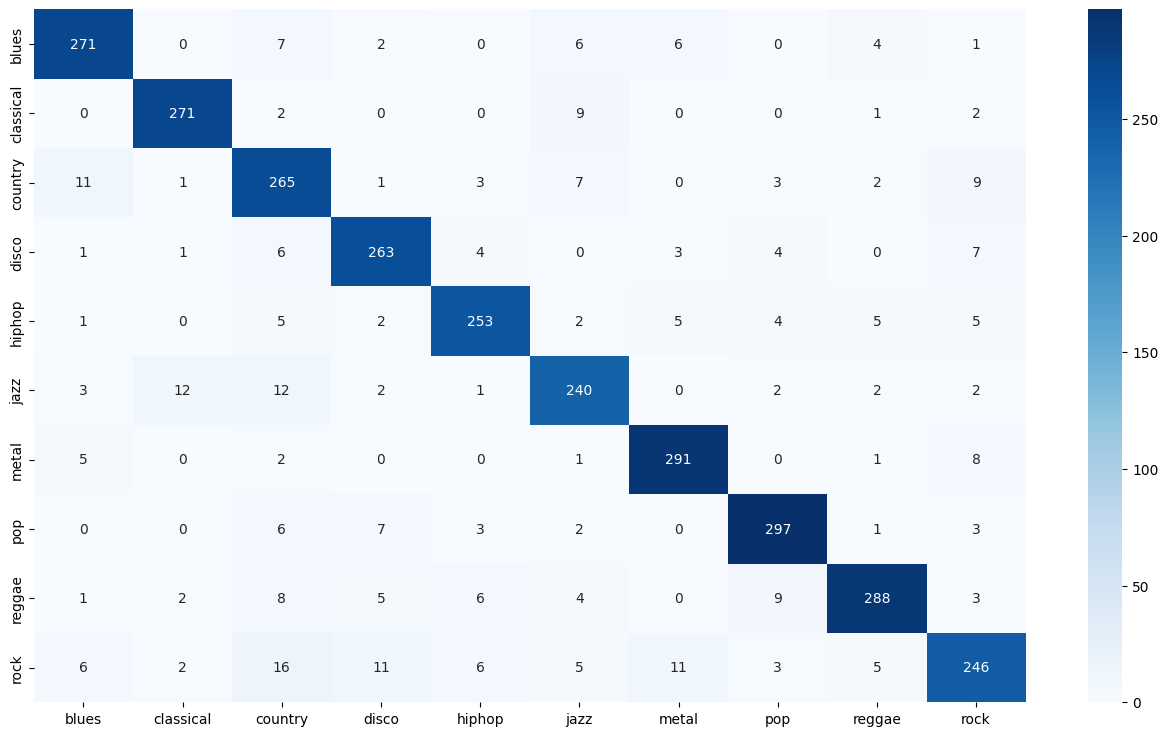

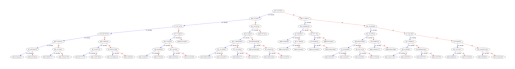

In [11]:
# Final model based on the best results from above:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
#xgb.fit(X_train, y_train)
#xgb.save_model("xgb_model.txt")     # Save learned model into a .txt-File
xgb.load_model("../Web Application/Trained_Models/xgb_model.txt")
preds = xgb.predict(X_test)

print('Accuracy', ':', round(metrics.accuracy_score(y_test, preds), 5), '\n')
print(metrics.classification_report(y_test, preds, digits=4))
print('F1-Score', ':', round(metrics.f1_score(y_test, preds, average='micro'), 5), '\n')
# Confusion Matrix
confusion_matr = metrics.confusion_matrix(y_test, preds)  # Check where there is a mismatch of the genres
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"], fmt=".0f");
plt.savefig("conf matrix")
plot_tree(xgb)
plt.show()

### Feature Importance

In [13]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=xgb, random_state=1) # Check which features are important/how there weight is
perm.fit(X_test, y_test)

eli5.show_weights(estimator=perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0512 ± 0.0108,rms_var
0.0503 ± 0.0051,harmony_mean
0.0373 ± 0.0050,mfcc4_mean
0.0349 ± 0.0054,chroma_stft_mean
0.0307 ± 0.0062,rms_mean
0.0282 ± 0.0067,harmony_var
0.0276 ± 0.0065,tempo
0.0264 ± 0.0054,spectral_bandwidth_mean
0.0258 ± 0.0055,mfcc9_mean
0.0238 ± 0.0042,perceptr_mean
